## Import Library yang diperlukan dan Datasheet

In [29]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score)
from urllib.parse import urlparse
from wordcloud import WordCloud
import nltk
import glob
nltk.download('punkt')
import os
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EZZRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Mencari semua file CSV dalam folder dataset (sesuaikan path jika perlu)
file_paths = glob.glob("data/*.csv")  # Ganti 'folder_dataset' dengan path folder

# Membaca dan menggabungkan semua dataset
df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# Menampilkan jumlah data setelah digabung
print(f"Total data setelah digabungkan: {df.shape[0]} baris dan {df.shape[1]} kolom")

Total data setelah digabungkan: 164972 baris dan 8 kolom


## Exploration Data Analsys

In [31]:
df.describe()

,label,urls
count,164972.000000,49860.000000
mean,0.519979,0.678018
std,0.499602,0.467241
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [32]:
df

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN
...,...,...,...,...,...,...,...,...
164967,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1.0,NaN
164968,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1.0,NaN
164969,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1.0,NaN
164970,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0.0,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164972 entries, 0 to 164971
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sender         49529 non-null   object 
 1   receiver       47768 non-null   object 
 2   date           49377 non-null   object 
 3   subject        82139 non-null   object 
 4   body           82485 non-null   object 
 5   label          164972 non-null  int64  
 6   urls           49860 non-null   float64
 7   text_combined  82486 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.1+ MB


C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884134010.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")


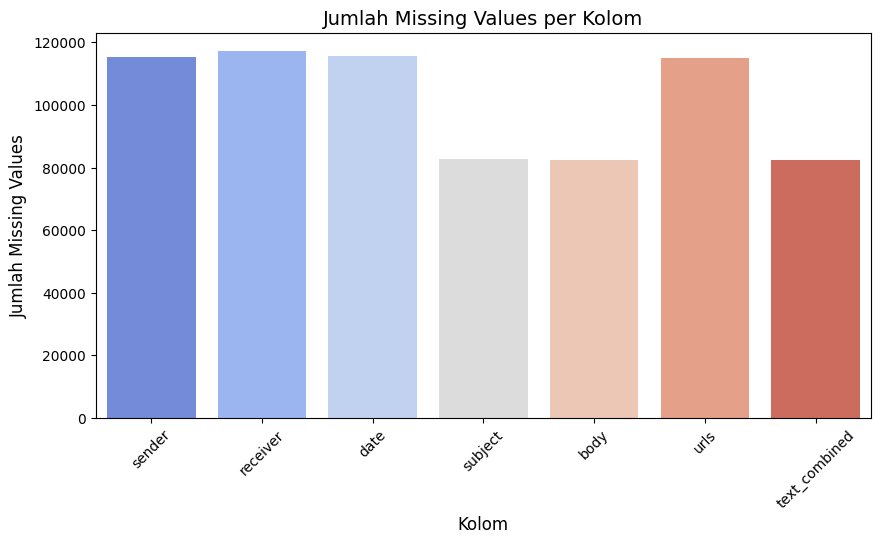

In [34]:
# Menghitung jumlah missing values untuk setiap kolom
missing_values = df.isnull().sum()

# Memfilter hanya kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0]

# Jika tidak ada missing values, hentikan eksekusi
if missing_values.empty:
    print("Tidak ada missing values dalam dataset.")
else:
    # Membuat plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")

    # Menambahkan judul dan label
    plt.title("Jumlah Missing Values per Kolom", fontsize=14)
    plt.xlabel("Kolom", fontsize=12)
    plt.ylabel("Jumlah Missing Values", fontsize=12)
    plt.xticks(rotation=45)  # Memiringkan label kolom agar lebih terbaca

    # Menampilkan plot
    plt.show()


In [35]:
df.isnull().sum()

sender           115443
receiver         117204
date             115595
subject           82833
body              82487
label                 0
urls             115112
text_combined     82486
dtype: int64

In [36]:
df.describe()

,label,urls
count,164972.000000,49860.000000
mean,0.519979,0.678018
std,0.499602,0.467241
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [37]:
df = df.dropna(subset=['subject', 'body'])


In [38]:
df

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN
...,...,...,...,...,...,...,...,...
164967,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1.0,NaN
164968,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1.0,NaN
164969,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1.0,NaN
164970,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0.0,NaN


In [39]:
df

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN
...,...,...,...,...,...,...,...,...
164967,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1.0,NaN
164968,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1.0,NaN
164969,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1.0,NaN
164970,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0.0,NaN


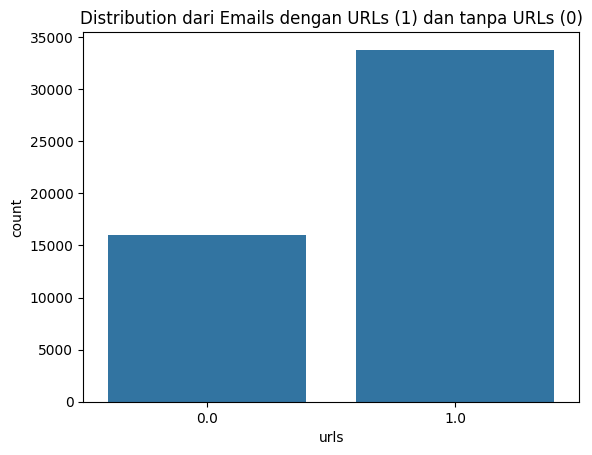

In [40]:
sns.countplot(x='urls', data=df)
plt.title('Distribution dari Emails dengan URLs (1) dan tanpa URLs (0)')
plt.show()

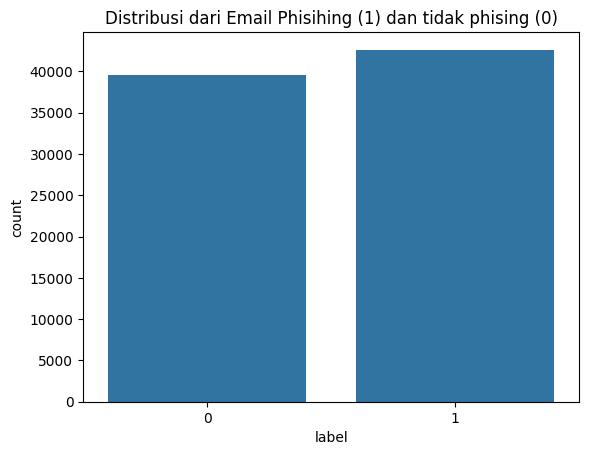

In [41]:
sns.countplot(x='label', data=df)
plt.title('Distribusi dari Email Phisihing (1) dan tidak phising (0)')
plt.show()

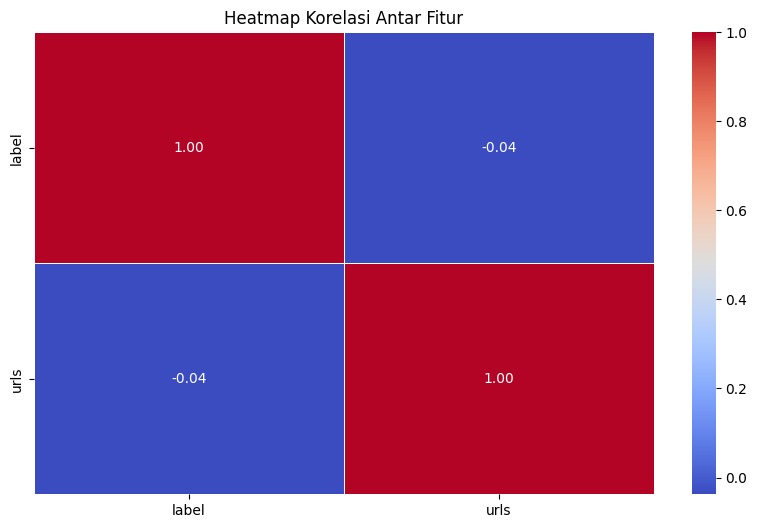

In [43]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi antar fitur numerik
correlation_matrix = numeric_df.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


Jumlah NaN di sender: 0


C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884275985.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if isinstance(x, str) and '@' in x else 'Unknown')
C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884275985.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sender_domain'] = df['sender_domain'].replace('Unknown', 'No Sender Info')


<Figure size 1200x600 with 0 Axes>

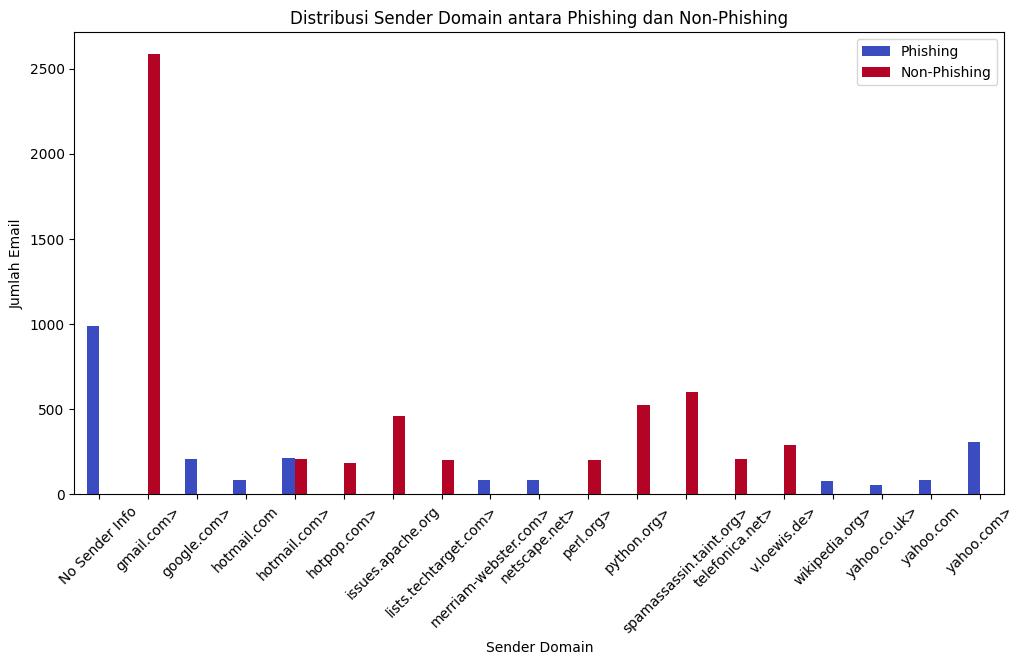

C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884275985.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phishing_domains.index, y=phishing_domains.values, ax=axes[0], palette="Reds_r")
C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884275985.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(phishing_domains.index, rotation=45)
C:\Users\EZZRA\AppData\Local\Temp\ipykernel_20388\884275985.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_phishing_domains.index, y=non_phishing_domains.values, ax=axes[1], palette="Blues_r")
C:\Users\EZZRA\AppData\Local\Temp\ipyke

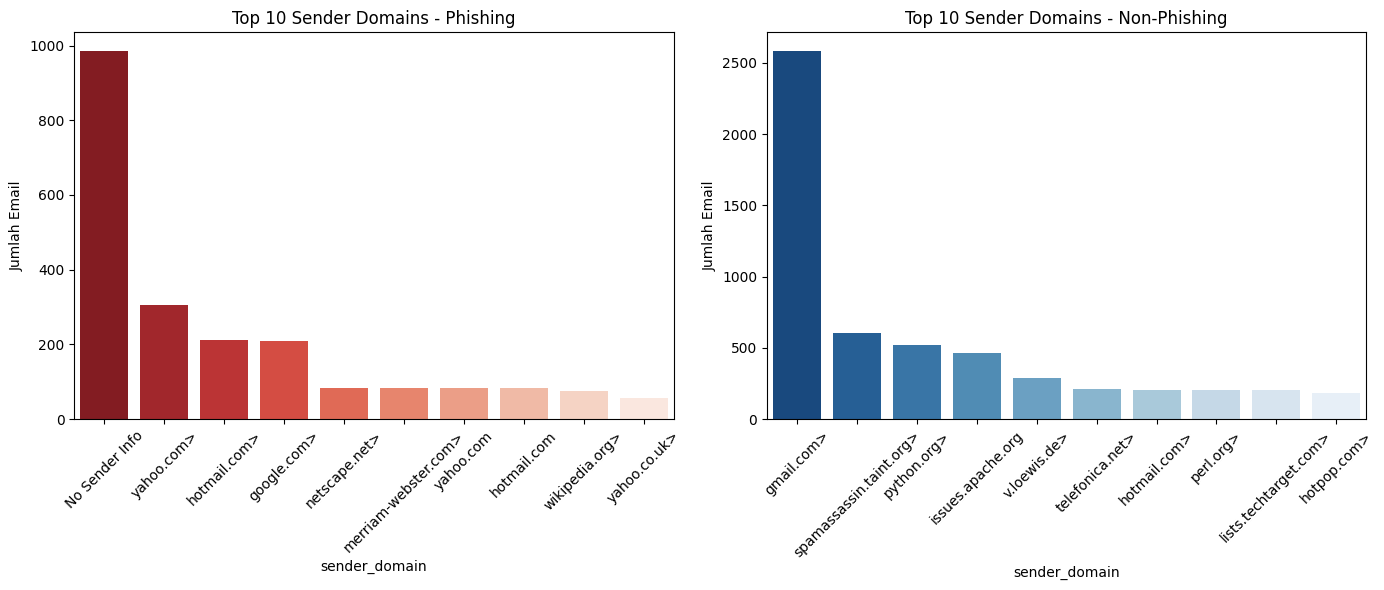

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cek jumlah NaN di kolom sender
missing_senders = df['sender'].isna().sum()
print(f"Jumlah NaN di sender: {missing_senders}")

# Pastikan sender tidak kosong dan memiliki '@'
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if isinstance(x, str) and '@' in x else 'Unknown')

# Cek distribusi domain pengirim (termasuk Unknown)
domain_counts = df['sender_domain'].value_counts()

# Jika terlalu banyak 'Unknown', coba lihat data sender yang valid
valid_senders = df[df['sender'].str.contains('@', na=False)]

# Mengganti 'Unknown' dengan label yang lebih informatif
df['sender_domain'] = df['sender_domain'].replace('Unknown', 'No Sender Info')

# Pisahkan phishing dan non-phishing
phishing_domains = df[df["label"] == 1]["sender_domain"].value_counts().head(10)
non_phishing_domains = df[df["label"] == 0]["sender_domain"].value_counts().head(10)

# Gabungkan dalam satu DataFrame untuk perbandingan
domain_comparison = pd.DataFrame({
    "Phishing": phishing_domains,
    "Non-Phishing": non_phishing_domains
}).fillna(0).astype(int)

# Visualisasi perbandingan domain phishing vs non-phishing
plt.figure(figsize=(12,6))
domain_comparison.plot(kind="bar", figsize=(12,6), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribusi Sender Domain antara Phishing dan Non-Phishing")
plt.ylabel("Jumlah Email")
plt.xlabel("Sender Domain")
plt.legend(["Phishing", "Non-Phishing"])
plt.show()

# Visualisasi individual untuk masing-masing kategori
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 sender domain phishing
sns.barplot(x=phishing_domains.index, y=phishing_domains.values, ax=axes[0], palette="Reds_r")
axes[0].set_title("Top 10 Sender Domains - Phishing")
axes[0].set_xticklabels(phishing_domains.index, rotation=45)
axes[0].set_ylabel("Jumlah Email")

# Top 10 sender domain non-phishing
sns.barplot(x=non_phishing_domains.index, y=non_phishing_domains.values, ax=axes[1], palette="Blues_r")
axes[1].set_title("Top 10 Sender Domains - Non-Phishing")
axes[1].set_xticklabels(non_phishing_domains.index, rotation=45)
axes[1].set_ylabel("Jumlah Email")

plt.tight_layout()
plt.show()


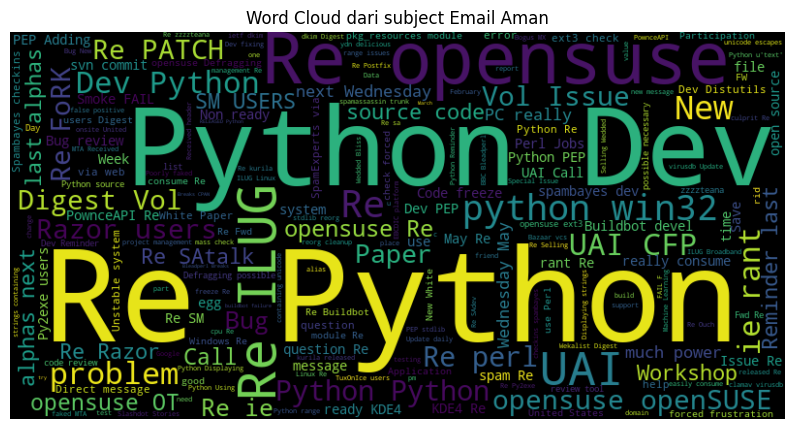

In [ ]:
safe_email = df[df["label"] == 0]
safe_text = " ".join(safe_email["subject"].astype(str).fillna(''))
word_cloud = WordCloud(width=800,height=400,background_color="black").generate(safe_text)
plt.figure(figsize=(10,6))
plt.title("Word Cloud dari subject Email Aman")
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

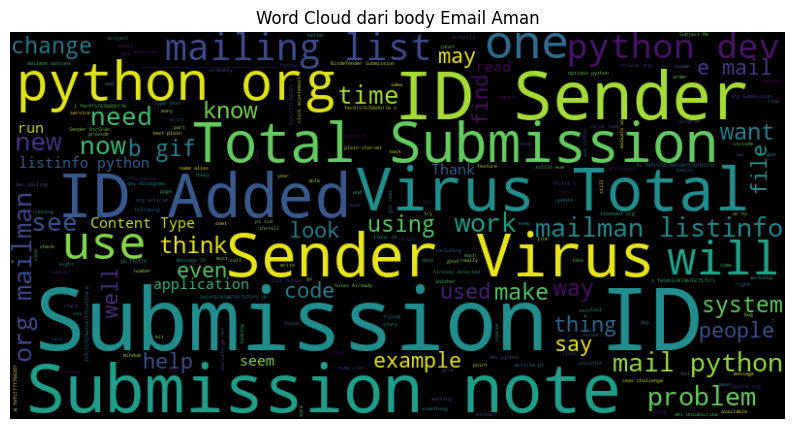

In [ ]:
safe_email = df[df["label"] == 0]
safe_text = " ".join(safe_email["body"].astype(str).fillna(''))
word_cloud = WordCloud(width=800,height=400,background_color="black").generate(safe_text)
plt.figure(figsize=(10,6))
plt.title("Word Cloud dari body Email Aman")
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

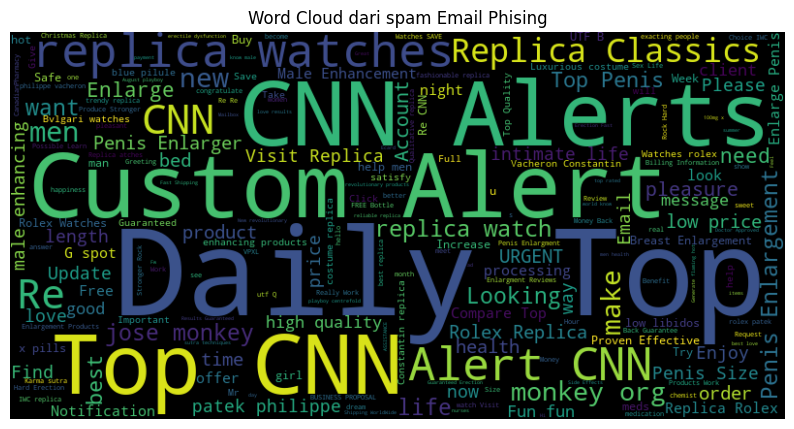

In [ ]:
safe_email = df[df["label"] == 1]
safe_text = " ".join(safe_email["subject"].astype(str).fillna(''))
word_cloud = WordCloud(width=800,height=400,background_color="black").generate(safe_text)
plt.figure(figsize=(10,6))
plt.title("Word Cloud dari spam Email Phising")
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

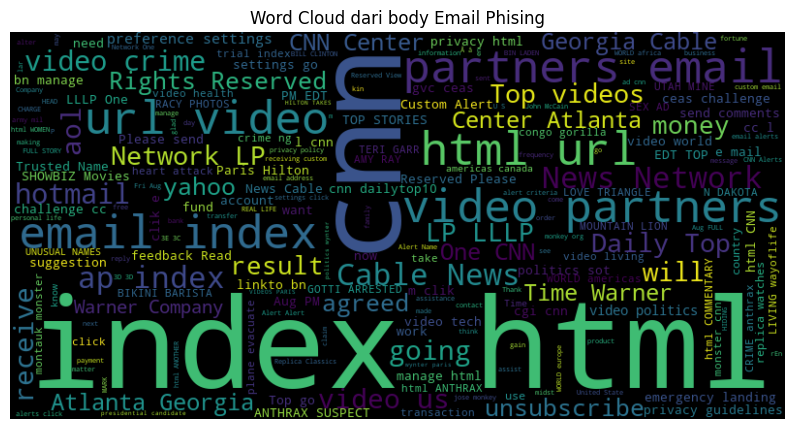

In [ ]:
safe_email = df[df["label"] == 1]
safe_text = " ".join(safe_email["body"].astype(str).fillna(''))
word_cloud = WordCloud(width=800,height=400,background_color="black").generate(safe_text)
plt.figure(figsize=(10,6))
plt.title("Word Cloud dari body Email Phising")
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Proceccing

In [ ]:
df

,sender,receiver,date,subject,body,label,urls,text_combined,sender_domain
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN,iworld.de>
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN,icable.ph>
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN,universalnet.psi.br>
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN,pobox.com>
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN,loanofficertool.com>
...,...,...,...,...,...,...,...,...,...
164967,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1.0,NaN,FrugalJoe.com
164968,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1.0,NaN,insiq.us>
164969,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1.0,NaN,yahoo.lv>
164970,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0.0,NaN,dialix.oz.au>
